# Market Basket Analysis (MBA) or Association Rule Mining
* Data mining technique used by retailers to analyze the purchase behaviour of customers.
* It identifies the relationship between different products and how they are purchased together.
* Use cases:
    * Retail industry
    * E-commerce
    * Healthcare: identify relationships between diseases and symptoms
    

References:
* https://medium.com/@data-overload/market-basket-analysis-techniques-applications-and-benefits-for-retailers-d66eed1f917e
* https://medium.com/mlearning-ai/market-basket-analysis-step-by-step-coding-cd13ce1f8de9
* https://towardsdatascience.com/data-mining-market-basket-analysis-with-apriori-algorithm-970ff256a92c
* https://medium.com/@jihargifari/how-to-perform-market-basket-analysis-in-python-bd00b745b106
* https://medium.com/analytics-vidhya/market-basket-analysis-using-association-rules-2b0f3e2a897d

In [60]:
%pip install openpyxl
%pip install mlxtend

Note: you may need to restart the kernel to use updated packages.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 38.2 MB/s eta 0:00:0000:01
Note: you may need to restart the kernel to use updated packages.


In [31]:
import opendatasets as od
import pandas as pd
import matplotlib.pyplot as plt

**Dataset:** Chen,Daqing. (2019). Online Retail II. UCI Machine Learning Repository. https://doi.org/10.24432/C5CG6D.

https://archive.ics.uci.edu/dataset/502/online+retail+ii

In [18]:
#DATASET_URL = "https://www.kaggle.com/datasets/heeraldedhia/groceries-dataset"
#DATASET_PATH = "./groceries-dataset/Groceries_dataset.csv"
DATASET_PATH = "./online_retail_II.xlsx"

In [19]:
def load_kaggle_dataset(url, path):
    od.download(url)
    df = pd.read_csv(path)
    return df

In [20]:
def load_xlsx_dataset(path):
    df = pd.read_excel(path)
    return df

In [21]:
# df = load_kaggle_dataset(DATASET_URL, DATASET_PATH)
df = load_xlsx_dataset(DATASET_PATH)
df.head(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
5,489434,22064,PINK DOUGHNUT TRINKET POT,24,2009-12-01 07:45:00,1.65,13085.0,United Kingdom
6,489434,21871,SAVE THE PLANET MUG,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
7,489434,21523,FANCY FONT HOME SWEET HOME DOORMAT,10,2009-12-01 07:45:00,5.95,13085.0,United Kingdom
8,489435,22350,CAT BOWL,12,2009-12-01 07:46:00,2.55,13085.0,United Kingdom
9,489435,22349,"DOG BOWL , CHASING BALL DESIGN",12,2009-12-01 07:46:00,3.75,13085.0,United Kingdom


In [26]:
print(df)

       Invoice StockCode                          Description  Quantity  \
0       489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1       489434    79323P                   PINK CHERRY LIGHTS        12   
2       489434    79323W                  WHITE CHERRY LIGHTS        12   
3       489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4       489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   
...        ...       ...                                  ...       ...   
525456  538171     22271                 FELTCRAFT DOLL ROSIE         2   
525457  538171     22750         FELTCRAFT PRINCESS LOLA DOLL         1   
525458  538171     22751       FELTCRAFT PRINCESS OLIVIA DOLL         1   
525459  538171     20970   PINK FLORAL FELTCRAFT SHOULDER BAG         2   
525460  538171     21931               JUMBO STORAGE BAG SUKI         2   

               InvoiceDate  Price  Customer ID         Country  
0      2009-12-01 07:45:00   6.95 

### Clean Data

In [27]:
df = df.dropna()
print(df)

       Invoice StockCode                          Description  Quantity  \
0       489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1       489434    79323P                   PINK CHERRY LIGHTS        12   
2       489434    79323W                  WHITE CHERRY LIGHTS        12   
3       489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4       489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   
...        ...       ...                                  ...       ...   
525456  538171     22271                 FELTCRAFT DOLL ROSIE         2   
525457  538171     22750         FELTCRAFT PRINCESS LOLA DOLL         1   
525458  538171     22751       FELTCRAFT PRINCESS OLIVIA DOLL         1   
525459  538171     20970   PINK FLORAL FELTCRAFT SHOULDER BAG         2   
525460  538171     21931               JUMBO STORAGE BAG SUKI         2   

               InvoiceDate  Price  Customer ID         Country  
0      2009-12-01 07:45:00   6.95 

In [28]:
positive_quantity_df = df[df["Quantity"] > 0]
print(positive_quantity_df)

       Invoice StockCode                          Description  Quantity  \
0       489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1       489434    79323P                   PINK CHERRY LIGHTS        12   
2       489434    79323W                  WHITE CHERRY LIGHTS        12   
3       489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4       489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   
...        ...       ...                                  ...       ...   
525456  538171     22271                 FELTCRAFT DOLL ROSIE         2   
525457  538171     22750         FELTCRAFT PRINCESS LOLA DOLL         1   
525458  538171     22751       FELTCRAFT PRINCESS OLIVIA DOLL         1   
525459  538171     20970   PINK FLORAL FELTCRAFT SHOULDER BAG         2   
525460  538171     21931               JUMBO STORAGE BAG SUKI         2   

               InvoiceDate  Price  Customer ID         Country  
0      2009-12-01 07:45:00   6.95 

In [49]:
def plot_country_bar(df):
    country_counts = df["Country"].value_counts().nlargest(10)
    countries = country_counts.index
    plt.barh(countries, country_counts)
    plt.xlabel('Purchase Count')
    plt.ylabel('Countries')
    plt.show()

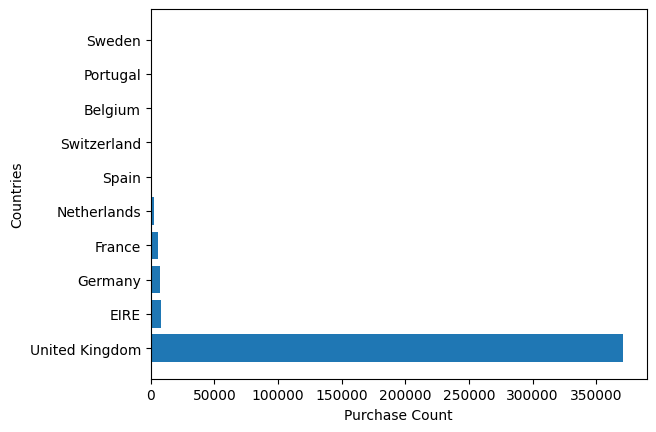

In [50]:
plot_country_bar(positive_quantity_df)

In [55]:
df_uk = positive_quantity_df[positive_quantity_df["Country"] == "United Kingdom"]
print(df_uk)
df_uk = df_uk.groupby(["Invoice", "Description"])['Quantity'].sum().unstack().reset_index().fillna(0).set_index('Invoice')
print(df_uk)

       Invoice StockCode                          Description  Quantity  \
0       489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1       489434    79323P                   PINK CHERRY LIGHTS        12   
2       489434    79323W                  WHITE CHERRY LIGHTS        12   
3       489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4       489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   
...        ...       ...                                  ...       ...   
525456  538171     22271                 FELTCRAFT DOLL ROSIE         2   
525457  538171     22750         FELTCRAFT PRINCESS LOLA DOLL         1   
525458  538171     22751       FELTCRAFT PRINCESS OLIVIA DOLL         1   
525459  538171     20970   PINK FLORAL FELTCRAFT SHOULDER BAG         2   
525460  538171     21931               JUMBO STORAGE BAG SUKI         2   

               InvoiceDate  Price  Customer ID         Country  
0      2009-12-01 07:45:00   6.95 

Description    DOORMAT UNION JACK GUNS AND ROSES   3 STRIPEY MICE FELTCRAFT  \
Invoice                                                                       
489434                                       0.0                        0.0   
489435                                       0.0                        0.0   
489436                                       0.0                        0.0   
489437                                       0.0                        0.0   
489438                                       0.0                        0.0   
...                                          ...                        ...   
538167                                       0.0                        0.0   
538168                                       0.0                        0.0   
538169                                       0.0                        0.0   
538170                                       0.0                        0.0   
538171                                       0.0    

In [56]:
def encode_products(x):
    if x <= 0:
        return 0
    else:
        return 1
df_uk_encoded = df_uk.applymap(encode_products)
print(df_uk_encoded)

Description    DOORMAT UNION JACK GUNS AND ROSES   3 STRIPEY MICE FELTCRAFT  \
Invoice                                                                       
489434                                         0                          0   
489435                                         0                          0   
489436                                         0                          0   
489437                                         0                          0   
489438                                         0                          0   
...                                          ...                        ...   
538167                                         0                          0   
538168                                         0                          0   
538169                                         0                          0   
538170                                         0                          0   
538171                                         0    

Get only transactions where more than 1 item was purchased.

In [58]:
df_multiple_products = df_uk_encoded[(df_uk_encoded > 0).sum(axis=1) >= 2]
print(df_multiple_products)

Description    DOORMAT UNION JACK GUNS AND ROSES   3 STRIPEY MICE FELTCRAFT  \
Invoice                                                                       
489434                                         0                          0   
489435                                         0                          0   
489436                                         0                          0   
489437                                         0                          0   
489438                                         0                          0   
...                                          ...                        ...   
538167                                         0                          0   
538168                                         0                          0   
538169                                         0                          0   
538170                                         0                          0   
538171                                         0    

### Apriori Algorithm

In [64]:
from mlxtend.frequent_patterns import apriori, association_rules

**support:** times that a set of items were bought together out of all the transactions.
**confidence:** 

In [66]:
frequent_itemsets = apriori(df_multiple_products, min_support=0.03, use_colnames=True).sort_values('support', ascending=False).reset_index(drop=True)
print(frequent_itemsets)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
print(frequent_itemsets)

/home/dlopes/anaconda3/envs/pytorch2/lib/python3.9/site-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


     support                                        itemsets
0   0.179578            (WHITE HANGING HEART T-LIGHT HOLDER)
1   0.092402                      (REGENCY CAKESTAND 3 TIER)
2   0.077842                 (ASSORTED COLOUR BIRD ORNAMENT)
3   0.076784                (STRAWBERRY CERAMIC TRINKET BOX)
4   0.070500                      (HOME BUILDING BLOCK WORD)
..       ...                                             ...
86  0.030490                          (POTTING SHED TEA MUG)
87  0.030303                (CREAM CUPID HEARTS COAT HANGER)
88  0.030241  (HEART OF WICKER SMALL, HEART OF WICKER LARGE)
89  0.030241                      (PLASTERS IN TIN SPACEBOY)
90  0.030116                (RED GINGHAM ROSE JEWELLERY BOX)

[91 rows x 2 columns]
     support                                        itemsets  length
0   0.179578            (WHITE HANGING HEART T-LIGHT HOLDER)       1
1   0.092402                      (REGENCY CAKESTAND 3 TIER)       1
2   0.077842                 (ASSORTED

In [62]:
frequent_itemsets = apriori(df_multiple_products, min_support=0.05, use_colnames=True).sort_values('support', ascending=False).reset_index(drop=True)
print(frequent_itemsets)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
print(frequent_itemsets)

/home/dlopes/anaconda3/envs/pytorch2/lib/python3.9/site-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


     support                              itemsets
0   0.179578  (WHITE HANGING HEART T-LIGHT HOLDER)
1   0.092402            (REGENCY CAKESTAND 3 TIER)
2   0.077842       (ASSORTED COLOUR BIRD ORNAMENT)
3   0.076784      (STRAWBERRY CERAMIC TRINKET BOX)
4   0.070500            (HOME BUILDING BLOCK WORD)
5   0.063842        (REX CASH+CARRY JUMBO SHOPPER)
6   0.063531         (60 TEATIME FAIRY CAKE CASES)
7   0.062037    (PACK OF 72 RETRO SPOT CAKE CASES)
8   0.061166               (HEART OF WICKER LARGE)
9   0.060855         (WOODEN FRAME ANTIQUE WHITE )
10  0.060793             (JUMBO BAG RED RETROSPOT)
11  0.058926                (LUNCH BAG RED SPOTTY)
12  0.058739    (RED HANGING HEART T-LIGHT HOLDER)
13  0.057993             (LUNCH BAG  BLACK SKULL.)
14  0.057682            (LOVE BUILDING BLOCK WORD)
15  0.057059              (JUMBO STORAGE BAG SUKI)
16  0.054695   (JUMBO SHOPPER VINTAGE RED PAISLEY)
17  0.054197             (LUNCH BAG SUKI  DESIGN )
18  0.052828               (HEA

In [65]:
association_rules(frequent_itemsets, metric="lift", min_threshold=1).sort_values('lift', ascending=False).reset_index(drop=True)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(WOODEN PICTURE FRAME WHITE FINISH),(WOODEN FRAME ANTIQUE WHITE ),0.049095,0.060855,0.033788,0.688213,11.309069,0.030800,3.012136,0.958639
1,(WOODEN FRAME ANTIQUE WHITE ),(WOODEN PICTURE FRAME WHITE FINISH),0.060855,0.049095,0.033788,0.555215,11.309069,0.030800,2.137898,0.970644
2,(STRAWBERRY CERAMIC TRINKET BOX),(SWEETHEART CERAMIC TRINKET BOX),0.076784,0.047415,0.036277,0.472447,9.964175,0.032636,1.805669,0.974464
3,(SWEETHEART CERAMIC TRINKET BOX),(STRAWBERRY CERAMIC TRINKET BOX),0.047415,0.076784,0.036277,0.765092,9.964175,0.032636,3.930114,0.944420
4,(HEART OF WICKER SMALL),(HEART OF WICKER LARGE),0.052828,0.061166,0.030241,0.572438,9.358753,0.027010,2.195785,0.942963
5,(HEART OF WICKER LARGE),(HEART OF WICKER SMALL),0.061166,0.052828,0.030241,0.494405,9.358753,0.027010,1.873380,0.951338
6,(LOVE BUILDING BLOCK WORD),(HOME BUILDING BLOCK WORD),0.057682,0.070500,0.031921,0.553398,7.849656,0.027854,2.081273,0.926020
7,(HOME BUILDING BLOCK WORD),(LOVE BUILDING BLOCK WORD),0.070500,0.057682,0.031921,0.452780,7.849656,0.027854,1.722011,0.938790
8,(RED HANGING HEART T-LIGHT HOLDER),(WHITE HANGING HEART T-LIGHT HOLDER),0.058739,0.179578,0.042934,0.730932,4.070274,0.032386,3.049127,0.801389
9,(WHITE HANGING HEART T-LIGHT HOLDER),(RED HANGING HEART T-LIGHT HOLDER),0.179578,0.058739,0.042934,0.239085,4.070274,0.032386,1.237012,0.919425


# TODO: 
* Try with fp-growth, eclat and CART
* Try making a little class to purchase items and get recommendations following each algorithm.